# Описание проекта


Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Условия задачи:

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Загрузите и подготовьте данные. Поясните порядок действий.

Обучите и проверьте модель для каждого региона:

  2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.

  2.2. Обучите модель и сделайте предсказания на валидационной выборке.

  2.3. Сохраните предсказания и правильные ответы на валидационной выборке.

  2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.

  2.5. Проанализируйте результаты.

Подготовьтесь к расчёту прибыли:

3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.

3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой 
скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.

3.3. Напишите выводы по этапу подготовки расчёта прибыли.

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

4.1. Выберите скважины с максимальными значениями предсказаний.

4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.

4.3. Рассчитайте прибыль для полученного объёма сырья.

Посчитайте риски и прибыль для каждого региона:

5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

# 1. Загрузка и подготовка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_geo_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/BP/geo_data_0.csv')
df_geo_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/BP/geo_data_1.csv')
df_geo_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shad/BP/geo_data_2.csv')

In [4]:
df_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_geo_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_geo_1.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [8]:
df_geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [9]:
df_geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [10]:
df_geo_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [11]:
# построим гистограммы признаков

In [12]:
bins_count = 30

Text(0.5, 1.0, 'Region 1, f2')

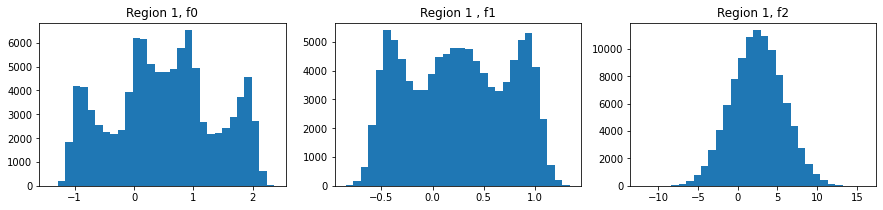

In [13]:
fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
ax0.hist(df_geo_1['f0'],bins=bins_count)
ax0.set_title('Region 1, f0')

ax1.hist(df_geo_1['f1'],bins=bins_count)
ax1.set_title('Region 1 , f1')

ax2.hist(df_geo_1['f2'],bins=bins_count)
ax2.set_title('Region 1, f2')

Text(0.5, 1.0, 'Region 2, f2')

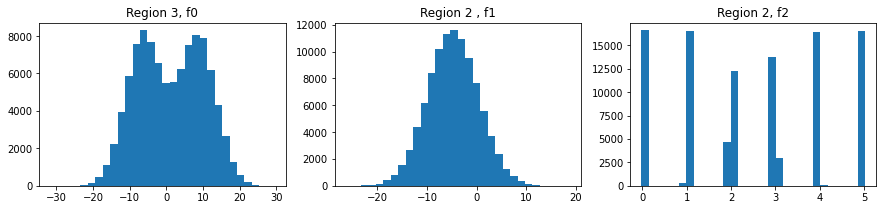

In [14]:
fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
ax0.hist(df_geo_2['f0'],bins=bins_count)
ax0.set_title('Region 3, f0')

ax1.hist(df_geo_2['f1'],bins=bins_count)
ax1.set_title('Region 2 , f1')

ax2.hist(df_geo_2['f2'],bins=bins_count)
ax2.set_title('Region 2, f2')

Text(0.5, 1.0, 'Region 3, f2')

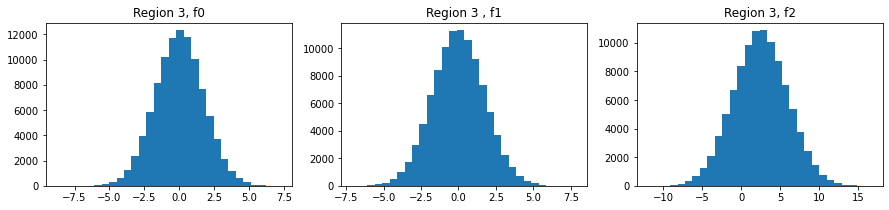

In [15]:
fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
ax0.hist(df_geo_3['f0'],bins=bins_count)
ax0.set_title('Region 3, f0')
ax1.hist(df_geo_3['f1'],bins=bins_count)
ax1.set_title('Region 3 , f1')
ax2.hist(df_geo_3['f2'],bins=bins_count)
ax2.set_title('Region 3, f2')

 Данные по всем районам однотипные. Пропусков нет.
Все три набора данных полученных с каждого региона по разным признакам отличаються доуг от друга разными формами распределения.

Данных полученные со второго региона по признаку f2 имеют больший разброс, и сильно отличаются по форме распределения от остальных, возможно это говорит о некой особенности данного региона.



<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка данных и первичный анализ сделаны верно.
</div>

# 2. Обучение и проверка модели

Для начала разобьем данные каждого региона на тестовые и валидационные выборки, затем обучим для каждого региона модели на своих данных.



# Разделим данные на выборки

In [16]:
# разделим данные на обучающую и обучающую и валидационную выборки, 

Первый регион

In [17]:
x_geo_1 = df_geo_1.drop(['id','product'],axis=1)
y_geo_1 = df_geo_1['product']

In [18]:
x_geo_1_train, x_geo_1_test, y_geo_1_train, y_geo_1_test = train_test_split(
    x_geo_1, y_geo_1, test_size = 0.25, random_state = 12345)

In [19]:
print (len(y_geo_1_train), len(x_geo_1_test))

75000 25000


Второй регион

In [20]:
x_geo_2 = df_geo_2.drop(['id','product'],axis=1)
y_geo_2 = df_geo_2['product']

In [21]:
x_geo_2_train, x_geo_2_test, y_geo_2_train, y_geo_2_test = train_test_split(
    x_geo_2, y_geo_2, test_size = 0.25, random_state = 12345)

In [22]:
print (len(y_geo_2_train), len(x_geo_2_test))

75000 25000


Третий регион

In [23]:
x_geo_3 = df_geo_3.drop(['id','product'],axis=1)
y_geo_3 = df_geo_3['product']

In [24]:
x_geo_3_train, x_geo_3_test, y_geo_3_train, y_geo_3_test = train_test_split(
    x_geo_3, y_geo_3, test_size = 0.25, random_state = 12345)

In [25]:
print (len(y_geo_1_train), len(x_geo_1_test))

75000 25000


<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение выполнено корректно, молодец, что проверяешь размеры выборок.
</div>

# Обучим модели для каждого из регионов.

In [26]:
model_1 = LinearRegression()

In [27]:
# обучим модель 
model_1.fit(x_geo_1_train, y_geo_1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# сохраним результат работы моедли для первого региона
predict_1 = pd.Series(model_1.predict(x_geo_1_test),index=x_geo_1_test.index)

In [29]:
mse_1 = mean_squared_error(y_geo_1_test, predict_1)

In [76]:
print('RMSE модели  первого региона', mse_1 ** 0.5)
print('Cреднее предсказанного запаса сырья для первого региона',predict_1.mean())

RMSE модели  первого региона 37.5794217150813
Cреднее предсказанного запаса сырья для первого региона 92.59256778438008


In [31]:
# Обучим модель для вторго региона 

In [32]:
model_r2 = LinearRegression()

In [33]:
model_r2.fit(x_geo_2_train, y_geo_2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
predict_2 = pd.Series(model_r2.predict(x_geo_2_test),index=x_geo_2_test.index)

In [35]:
mse_2 = mean_squared_error(y_geo_2_test, predict_2)

In [77]:
print('RMSE модели  второго региона', mse_2 ** 0.5)
print('Cреднее предсказанного запаса сырья для второго региона',predict_2.mean())

RMSE модели  второго региона 0.893099286775616
Cреднее предсказанного запаса сырья для второго региона 68.7285468954458


Показатели модели второго региона очень хорошие модель точна в своих предсказаниях.

In [37]:
# Обучим модель обученную только на даных третьего региона
model_3 = LinearRegression()

In [38]:
model_3.fit(x_geo_3_train, y_geo_3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
predict_3 = pd.Series(model_3.predict(x_geo_3_test),index=x_geo_3_test.index)

In [40]:
mse_3 = mean_squared_error(y_geo_3_test, predict_3)

In [79]:
print('RMSE модели терьего региона', mse_3 ** 0.5)
print('Cреднее предсказанного запаса сырья для третьего региона',predict_3.mean())

RMSE модели терьего региона 40.02970873393434
Cреднее предсказанного запаса сырья для третьего региона 94.96504596800506


# 3. Подготовка к расчёту прибыли

Условия

Для разведки региона используют 500 точек и выбирают 200 лучших по результатам модели

Затраты на разработку 200-т вышек 10 млрд

Цена за 1 еденицу продукта 450 000 



In [42]:
# Для разработки региона отбирают 200 вышек, стоимость затран на разработку 10 000 000 000. 
# найдем точку безубыточности 

# точка безубыточности
BEP = (10000000000 / 450000) / 200
# Цена за еденицу продукта
PRICE = 450000
# Кол-во вышек для разработки региона
COUNT = 200
# Затраты на разработку региона
COST = 10000000000

Минимальное кол-во сырья  на одну вышку в регионе, для его безубыточной разработки 111,11 тыс едениц продукта


In [43]:
# оценим среднее кол-во едениц продукта на одну вышку

In [44]:
y_geo_1.mean()

92.49999999999976

In [45]:
y_geo_2.mean()

68.82500000002561

In [46]:
y_geo_3.mean()

95.00000000000041

Средний показатель модели и фактический очень близки. Но очень низок по сравнению с данными по точке безубыточности.

# 4. Расчёт прибыли и рисков 

In [47]:
# функция расчета прибыли 

In [48]:
def revenue(valid_data, predicted_data,count):
  top_predicted = predicted_data.sort_values(ascending=False)
  selected = valid_data[top_predicted.index][:COUNT]
  return selected.sum() * PRICE - COST

In [49]:
# определим прибыль с каждого региона основываясь на прогнозах модлей

In [50]:
def check_risk(y_test, predict):

  state = np.random.RandomState(12345)
  values = []
  for i in range(1000):
    geo_subsamle = y_test.sample(n=500, replace=True, random_state=state)
    
    predict_subsample = predict.loc[geo_subsamle.index] 
    values.append(revenue(geo_subsamle,predict_subsample,COUNT))

  values = pd.Series(values)
  return values

Результирующая таблица

In [51]:
result = pd.DataFrame(columns=['region', 'profit_mean', 
                               'probability_loss', 
                               'profit_min', 
                               '95%_interval_profit_min',
                               '95%_interval_profit_max'])

In [52]:
result

,region,profit_mean,probability_loss,profit_min,95%_interval_profit_min,95%_interval_profit_max


In [71]:
# функция для оформления финальных результатов
def result_fromat(array_result,region,array_values):
  profit_mean = "{:,.2f}".format(array_values.mean())
  probability_loss = "{:,.2f}".format((array_values < 0).mean())
  profit_min = "{:,.2f}".format(array_values.quantile(0.025))
  interval_profit_min = profit_min
  interval_profit_max = "{:,.2f}".format(array_values.quantile(0.975))
  
  array_result.loc[len(array_result), :] = ([region,profit_mean, probability_loss, profit_min, interval_profit_min, interval_profit_max])
  return array_result

## Первый регион

In [54]:
value_1 = check_risk(y_geo_1_test, predict_1)

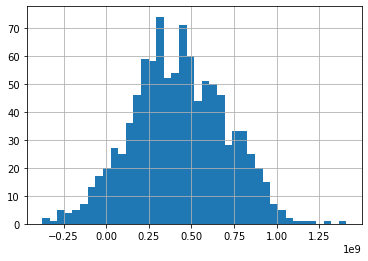

In [75]:
value_1.hist(bins=40)

## Первый регион

In [56]:
result_fromat(result, 1 , value_1)

,region,profit_mean,probability_loss,profit_min,95%_interval_profit_min,95%_interval_profit_max
0,1,"425,938,526.91",0.06,"-102,090,094.84","-102,090,094.84","947,976,353.36"


## Второй регион

In [58]:
value_2 = check_risk(y_geo_2_test, predict_2)

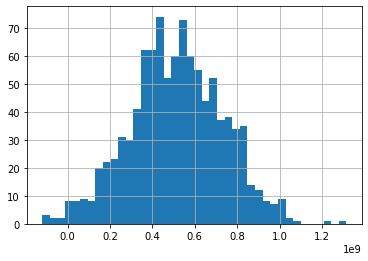

In [74]:
value_2.hist(bins=40)

## Третий Регион

In [60]:
result_fromat(result, 2 , value_2)

,region,profit_mean,probability_loss,profit_min,95%_interval_profit_min,95%_interval_profit_max
0,1,"425,938,526.91",0.06,"-102,090,094.84","-102,090,094.84","947,976,353.36"
1,2,"515,222,773.44",0.01,"68,873,225.37","68,873,225.37","931,547,591.26"


In [62]:
value_3 = check_risk(y_geo_3_test, predict_3)

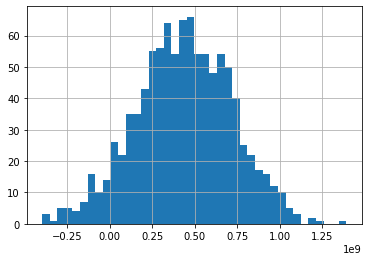

In [73]:
value_3.hist(bins=40)

In [64]:
result_fromat(result, 3 , value_3)

,region,profit_mean,probability_loss,profit_min,95%_interval_profit_min,95%_interval_profit_max
0,1,"425,938,526.91",0.06,"-102,090,094.84","-102,090,094.84","947,976,353.36"
1,2,"515,222,773.44",0.01,"68,873,225.37","68,873,225.37","931,547,591.26"
2,3,"435,008,362.78",0.06,"-128,880,547.33","-128,880,547.33","969,706,954.18"


# Итог
Для решения задачи были построены индивидуальные модели для каждого из регионов, основываясь на предположении о сильном отличии регионов друг от друга

Под условия поставленной задачи для дальнейшей разработки  только второй регион.


Риски получить убыток по данному региону наименьшие среди всех изученных. И полностью соответсвуют условию задачи.

Вероятнее всего данный регион хорош из-за своей скрытой для нас особенности, которая нам видна только на гисторамме. Среди всех остальных регионов его три показателя имеют различные распределения, данных.

Так же модель на этих данных дала самый точные предсказания.





